In [ ]:
from IPython.display import display_html
def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()



In [11]:
import parmed as pmd
import mbuild as mb
import numpy as np
import foyer
from scipy.optimize import curve_fit
from itertools import tee
import matplotlib.pyplot as plt
%inline matplotlib 
import warnings
warnings.filterwarnings('ignore')

/home/mike/miniconda3/envs/planckton/lib/python3.6/site-packages/plyplus/plyplus.py:758: DeprecationWarning: invalid escape sequence '\.'
  return codecs.getdecoder('unicode_escape')(token_value)[0]
/home/mike/miniconda3/envs/planckton/lib/python3.6/site-packages/plyplus/plyplus.py:758: DeprecationWarning: invalid escape sequence '\d'
  return codecs.getdecoder('unicode_escape')(token_value)[0]
/home/mike/miniconda3/envs/planckton/lib/python3.6/site-packages/plyplus/plyplus.py:758: DeprecationWarning: invalid escape sequence '\('
  return codecs.getdecoder('unicode_escape')(token_value)[0]
/home/mike/miniconda3/envs/planckton/lib/python3.6/site-packages/plyplus/plyplus.py:758: DeprecationWarning: invalid escape sequence '\)'
  return codecs.getdecoder('unicode_escape')(token_value)[0]
/home/mike/miniconda3/envs/planckton/lib/python3.6/site-packages/plyplus/plyplus.py:758: DeprecationWarning: invalid escape sequence '\+'
  return codecs.getdecoder('unicode_escape')(token_value)[0]
/home

In [2]:
ptb7 = mb.load("compounds/ptb7_typed.mol2")
itic = mb.load("compounds/itic_typed.mol2")
#cmpd = pmd.load_file("compounds/itic_typed.mol2")

In [3]:
#ptb7.visualize() #mono

In [4]:
class TestCompound(mb.Compound):
    def __init__(self):
        super(TestCompound, self).__init__()
        a = mb.Particle(name='A')
        self.add(a, label='A')
        b = mb.Particle(name='B',pos=[1, 0, 0])
        self.add(b, label='B')
test_cmpd = TestCompound().save("distance_check.hoomdxml", overwrite=True)

In [5]:
!head distance_check.hoomdxml

<?xml version="1.2" encoding="UTF-8"?>
<hoomd_xml version="1.2">
<configuration time_step="0">
<box units="sigma"  Lx="15.0" Ly="5.0" Lz="5.0"/>
<position units="sigma" num="2">
-7.5	-2.5	-2.5
2.5	-2.5	-2.5
</position>
<type>
A


In [14]:
def test_typing(compound_file, ff_file):
    compound_mb = mb.load(compound_file)
    compound_pmd = pmd.load_file(compound_file)
    n_compounds = [50]
    density = 700
    compound = [compound_mb]
    total_mass = np.sum([n*np.sum([a.mass for a in c.to_parmed().atoms]) for c,n in zip(compound, n_compounds)])
    print(total_mass)
    L = (total_mass/density)**(1/3)*1.1841763
    print(L)
    types_needed = set()
    for atom_pmd, atom_mb in zip(compound_pmd, compound_mb):
        atom_mb.name = "_{}".format(atom_pmd.type)
        types_needed.add(atom_pmd.type)
    #box = mb.packing.fill_box(compound_mb, n_compounds=50, box=[6.53, 6.53, 6.53], overlap=0.2, fix_orientation=False)
    #box.save("test_typing.hoomdxml", 
    #        overwrite=True,
    #        forcefield_files="compounds/gaff.4fxml",
    #        ref_mass=32.06,
    #        ref_energy=1.046,
    #        ref_distance=0.35635948725613575)

compound_file = "compounds/itic_typed.mol2"
ff_file = "compounds/gaff.4fxml"
test_typing(compound_file, ff_file)

#box = mb.packing.fill_box(itic_mb, n_compounds=1, box=[10, 10, 10], fix_orientation=False)
#box.save("itic_box.hoomdxml",
#         forcefield_files="force_fields/gaff/opv_gaff.xml",
#         overwrite=True,
#         ref_distance=3.56359487256,
#         ref_mass=32.06,
#         ref_energy=1,)
         #foyer_kwargs=foyer_kwargs)


71396.96
5.532782420549309


In [3]:
class Compound(mb.Compound):
    ''' Wrapper class for mb.Compound'''
    def __init__(self, path_to_mol2):
        super(Compound, self).__init__()
        mb.load(path_to_mol2, compound=self)
        self.mass = np.sum([atom.mass for atom in self.to_parmed().atoms])
        # We need to rename the atom types
        compound_pmd = pmd.load_file(path_to_mol2)
        for atom_pmd, atom_mb in zip(compound_pmd, self):
            atom_mb.name = "_{}".format(atom_pmd.type)

            
test = Compound("compounds/itic_typed.mol2")
print(test)
for atom in test:
    print(atom.name)
test.mass

<Compound 186 particles, non-periodic, 200 bonds, id: 140102036411392>
_ca
_ca
_ca
_ha
_ca
_ha
_ca
_ca
_ha
_ha
_cc
_cc
_c
_o
_cf
_ch
_ch
_n1
_n1
_cf
_cd
_ha
_ss
_cd
_cc
_cc
_ha
_cd
_ss
_cc
_c3
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ha
_ha
_ha
_ha
_ha
_ha
_ha
_ha
_c3
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_hc
_hc
_hc
_c3
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_hc
_hc
_hc
_ca
_ca
_ca
_ca
_ha
_ha
_cd
_c3
_cc
_ss
_cd
_cc
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_ca
_c3
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_hc
_hc
_hc
_c3
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_c3
_hc
_hc
_hc
_hc
_hc
_ha
_ha
_ha
_ha
_ha
_ha
_ha
_ha
_ss
_cc
_cd
_ha
_ce
_cd
_ha
_c
_ca
_ca
_cd
_o
_ce
_cg
_cg
_n1
_n1
_ca
_ca
_ca
_ca
_ha
_ha
_ha
_ha


1427.9392

In [8]:
# 1427.9392
['ANGLE_FORCE_GROUP', 'BOND_FORCE_GROUP', 'CMAP_FORCE_GROUP', 'DIHEDRAL_FORCE_GROUP', 'IMPROPER_FORCE_GROUP', 'NONBONDED_FORCE_GROUP', 'OUT_OF_PLANE_BEND_FORCE_GROUP', 'PI_TORSION_FORCE_GROUP', 'RB_TORSION_FORCE_GROUP', 'STRETCH_BEND_FORCE_GROUP', 'TORSION_TORSION_FORCE_GROUP', 'TRIGONAL_ANGLE_FORCE_GROUP', 'UREY_BRADLEY_FORCE_GROUP', '__add__', '__bool__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_force_to_system', '_box', '_combining_rule', '_coordinates', '_get_gb_parameters', '_get_selection_array', '_omm_geometric_force', '_omm_nbfixed_force', '_prune_empty_adjusts', '_prune_empty_angles', '_prune_empty_bonds', '_prune_empty_chiral_frames', '_prune_empty_cmaps', '_prune_empty_dihedrals', '_prune_empty_impropers', '_prune_empty_multipole_frames', '_prune_empty_out_of_plane_bends', '_prune_empty_pi_torsions', '_prune_empty_rb_torsions', '_prune_empty_stretch_bends', '_prune_empty_torsion_torsions', '_prune_empty_trigonal_angles', '_prune_empty_ureys', 'acceptors', 'add_atom', 'add_atom_to_residue', 'adjust_types', 'adjusts', 'angle_types', 'angles', 'assign_bonds', 'atoms', 'bond_types', 'bonds', 'box', 'box_vectors', 'chiral_frames', 'cmap_types', 'cmaps', 'combining_rule', 'coordinates', 'copy', 'createSystem', 'dihedral_types', 'dihedrals', 'donors', 'get_box', 'get_coordinates', 'groups', 'has_NBFIX', 'improper_types', 'impropers', 'is_changed', 'join_dihedrals', 'load_dataframe', 'multipole_frames', 'nrexcl', 'omm_add_constraints', 'omm_angle_force', 'omm_bond_force', 'omm_cmap_force', 'omm_dihedral_force', 'omm_gbsa_force', 'omm_improper_force', 'omm_nonbonded_force', 'omm_out_of_plane_bend_force', 'omm_pi_torsion_force', 'omm_rb_torsion_force', 'omm_set_virtual_sites', 'omm_stretch_bend_force', 'omm_torsion_torsion_force', 'omm_trigonal_angle_force', 'omm_urey_bradley_force', 'out_of_plane_bend_types', 'out_of_plane_bends', 'pi_torsion_types', 'pi_torsions', 'positions', 'prune_empty_terms', 'rb_torsion_types', 'rb_torsions', 'residues', 'save', 'space_group', 'split', 'stretch_bend_types', 'stretch_bends', 'strip', 'symmetry', 'title', 'to_dataframe', 'topology', 'torsion_torsion_types', 'torsion_torsions', 'trigonal_angle_types', 'trigonal_angles', 'unchange', 'unknown_functional', 'update_dihedral_exclusions', 'urey_bradley_types', 'urey_bradleys', 'velocities', 'view', 'visualize', 'write_cif', 'write_pdb', 'write_psf']


['ANGLE_FORCE_GROUP',
 'BOND_FORCE_GROUP',
 'CMAP_FORCE_GROUP',
 'DIHEDRAL_FORCE_GROUP',
 'IMPROPER_FORCE_GROUP',
 'NONBONDED_FORCE_GROUP',
 'OUT_OF_PLANE_BEND_FORCE_GROUP',
 'PI_TORSION_FORCE_GROUP',
 'RB_TORSION_FORCE_GROUP',
 'STRETCH_BEND_FORCE_GROUP',
 'TORSION_TORSION_FORCE_GROUP',
 'TRIGONAL_ANGLE_FORCE_GROUP',
 'UREY_BRADLEY_FORCE_GROUP',
 '__add__',
 '__bool__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_force_to_system',
 '_box',
 '_combining_rule',
 '_coordinates',
 '_get_gb_parameters',
 '_get_selection_array',
 '_omm_

In [3]:
itic_mb = mb.load("itic.hoomdxml")
itic_mb.save("itic_with_ff.hoomdxml", 
          overwrite=True,
          forcefield_files="force_fields/gaff/opv_gaff.xml"
         )

/home/mike/Projects/mbuild/mbuild/compound.py:2183: UserWarning: Guessing that "<_ca pos=(-18.0165,-18.5025,-7.2835), 0 bonds, id: 139993977014592>" is element: "EP"
  atom, element))
/home/mike/Projects/mbuild/mbuild/compound.py:2183: UserWarning: Guessing that "<_ha pos=(-17.5695,-16.5325,-7.9805), 0 bonds, id: 139993977015488>" is element: "EP"
  atom, element))
/home/mike/Projects/mbuild/mbuild/compound.py:2183: UserWarning: Guessing that "<_cc pos=(-15.4575,-21.2405,-6.9105), 0 bonds, id: 139993976993720>" is element: "EP"
  atom, element))
/home/mike/Projects/mbuild/mbuild/compound.py:2183: UserWarning: Guessing that "<_c pos=(-13.8935,-19.4865,-7.4345), 0 bonds, id: 139993976992488>" is element: "EP"
  atom, element))
/home/mike/Projects/mbuild/mbuild/compound.py:2183: UserWarning: Guessing that "<_o pos=(-12.8765,-18.8395,-7.6495), 0 bonds, id: 139993976992824>" is element: "EP"
  atom, element))
/home/mike/Projects/mbuild/mbuild/compound.py:2183: UserWarning: Guessing that "<_

<Atom 0 (_ca) of chain 0 residue 0 (RES)>


/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomistic element type detected. Creating custom element for _c
  'Creating custom element for {}'.format(element))
/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomistic element type detected. Creating custom element for _c3
  'Creating custom element for {}'.format(element))
/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomistic element type detected. Creating custom element for _ca
  'Creating custom element for {}'.format(element))
/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomistic element type detected. Creating custom element for _cc
  'Creating custom element for {}'.format(element))
/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomistic element type detected. Creating custom element for _cd
  'Creating custom element for {}'.format(element))
/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomisti

AttributeError: 'Atom' object has no attribute 'whitelist'

hoomd
k 2.0 d -1.0 n 2.0


/home/mike/miniconda3/envs/mbuild/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/mike/miniconda3/envs/mbuild/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


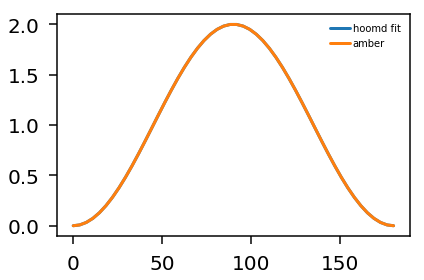

In [55]:
x = np.linspace(0, 180)

# 4    4.000       180.000           2.000

def hoomd_harmonic_dihedral(phi, k, d, n):
    return (1/2)*k*(1+d*np.cos(n*np.deg2rad(phi)))

def PeriodicTorsionForce(theta, k, n, theta0):
    return k*(1+np.cos(n*theta-theta0))

def amber_dihedral(phi, V, n, gamma):
    return V*(1+np.cos(n*np.deg2rad(phi)-np.deg2rad(gamma)))

def opls_dihedral(phi, k1, k2, k3, k4):
    theta = np.deg2rad(phi)
    total = 0
    for i,k in enumerate([k1, k2, k3, k4], start=1):
        total += (1/2)*k*(1+(((-1)**(i+1))*np.cos(i*theta)))
    return total

divider = 4
barrier_term = 4
phase = 180
periodicity = 2
opls_dihedral(1,2,3,4,5)

p0 = [1, 1, 2]

y = amber_dihedral(x, barrier_term/divider, periodicity, phase)
popt, pcov = curve_fit(hoomd_harmonic_dihedral, x, y, p0=p0)

print("hoomd")
print("k {} d {} n {}".format(*popt))
#divider = 9
#barrier_term = 1.4
#phase = 0
#periodicity = 3
#print(amber_dihedral(0, barrier_term/divider, periodicity, phase))

#plt.plot(x, hoomd_harmonic_dihedral(x, 1, 1, 1), label="hoomd")
#plt.plot(x, PeriodicTorsionForce(x, 1/2, 1, np.pi))
plt.plot(x, hoomd_harmonic_dihedral(x, *popt), label="hoomd fit")
plt.plot(x, y, label="amber")
plt.legend()

opls
k1 -0.2754677734403915 k2 0.720374218675095 k3 0.5845322217109078 k4 0.22037422370158685


/home/mike/miniconda3/envs/mbuild/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/mike/miniconda3/envs/mbuild/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


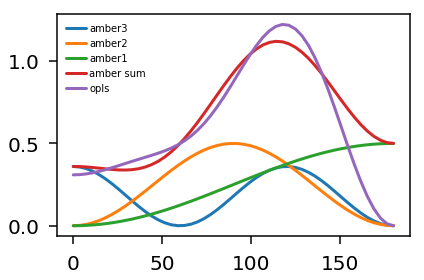

In [61]:
#c3-c3-c3-c3   1    0.180         0.000          -3.000
#c3-c3-c3-c3   1    0.250       180.000          -2.000
#c3-c3-c3-c3   1    0.200       180.000           1.000

x = np.linspace(0, 180)


divider = 1
barrier_term = 0.180
phase = 0
periodicity = 3


p0 = [0, 0, 0, 0]

y3 = amber_dihedral(x, 0.18/divider, 3, 0)
y2 = amber_dihedral(x, 0.25/divider, 2, 180)
y1 = amber_dihedral(x, 0.25/divider, 1, 180)

popt, pcov = curve_fit(opls_dihedral, x, y3 + y2 + y1, p0=p0)
#plt.plot(x, hoomd_harmonic_dihedral(x, *popt), label="hoomd fit")
plt.plot(x, y3, label="amber3")
plt.plot(x, y2, label="amber2")
plt.plot(x, y1, label="amber1")
plt.plot(x, y3 + y2 + y1, label="amber sum")
plt.plot(x, opls_dihedral(x, *popt), label="opls")
plt.legend()
print("opls")
print("k1 {} k2 {} k3 {} k4 {}".format(*popt))

In [42]:
# Let's try the franken FF
itic_mb = mb.load("compounds/ptb7_typed.mol2")
for atom in itic_mb:
    if atom.name.startswith("H"):
        itic_mb.remove(atom)
for atom in itic_mb:
    if atom.name.startswith("H"):
        itic_mb.remove(atom)
for atom in itic_mb:
    if atom.name.startswith("H"):
        itic_mb.remove(atom)
for atom in itic_mb:
    if atom.name.startswith("H"):
        itic_mb.remove(atom)
itic_mb.visualize()    
itic_mb.save("ptb7_with_ff_opls.hoomdxml", 
          overwrite=True,
          forcefield_files="force_fields/oplsua/opls-custom.xml",
          ref_distance=3.9050,
          ref_mass=32.06,
          ref_energy=0.3550)

/home/mike/miniconda3/envs/mbuild/lib/python3.6/site-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/mike/miniconda3/envs/mbuild/lib/python3.6/site-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomistic element type detected. Creating custom element for _C2
  'Creating custom element for {}'.format(element))
/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomistic element type detected. Creating custom element for _CH
  'Creating custom element for {}'.format(element))
/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomistic element type detected. Creating custom element for _C3
  'Creating custom element for {}'.format(element))
/home/mike/Projects/foyer/foyer/forcefield.py:296: UserWarning: Non-atomistic element

Missing dihedral with ids (0, 1, 2, 3) and types ['opls_230', 'opls_230', 'opls_230', 'opls_230'].
Missing dihedral with ids (0, 1, 2, 7) and types ['opls_230', 'opls_230', 'opls_230', 'opls_502'].
Missing dihedral with ids (0, 1, 5, 6) and types ['opls_230', 'opls_230', 'opls_230', 'opls_230'].
Missing dihedral with ids (0, 1, 5, 8) and types ['opls_230', 'opls_230', 'opls_230', 'opls_398'].
Missing dihedral with ids (0, 4, 3, 2) and types ['opls_230', 'opls_502', 'opls_230', 'opls_230'].
Missing dihedral with ids (0, 4, 3, 20) and types ['opls_230', 'opls_502', 'opls_230', 'opls_230'].
Missing dihedral with ids (1, 0, 4, 3) and types ['opls_230', 'opls_230', 'opls_502', 'opls_230'].
Missing dihedral with ids (1, 2, 3, 4) and types ['opls_230', 'opls_230', 'opls_230', 'opls_502'].
Missing dihedral with ids (1, 2, 3, 20) and types ['opls_230', 'opls_230', 'opls_230', 'opls_230'].
Missing dihedral with ids (1, 2, 7, 6) and types ['opls_230', 'opls_230', 'opls_502', 'opls_230'].
Missing 

/home/mike/Projects/foyer/foyer/forcefield.py:226: UserWarning: Parameters have not been assigned to all angles. Total system angles: 74, Parameterized angles: 21
  warnings.warn(msg)
/home/mike/Projects/foyer/foyer/forcefield.py:226: UserWarning: Parameters have not been assigned to all proper dihedrals. Total system dihedrals: 104, Parameterized dihedrals: 18. Note that if your system contains torsions of Ryckaert-Bellemans functional form, all of these torsions are processed as propers.
  warnings.warn(msg)
/home/mike/Projects/foyer/foyer/forcefield.py:226: UserWarning: Parameters have not been assigned to all impropers. Total system impropers: 16, Parameterized impropers: 0. Note that if your system contains torsions of Ryckaert-Bellemans functional form, all of these torsions are processed as propers
  warnings.warn(msg)
/home/mike/Projects/mbuild/mbuild/compound.py:1739: UserWarning: System is not charge neutral. Total charge is -3.874800000000002.
  ''.format(total_charge))


/home/mike/miniconda3/envs/mbuild/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/mike/miniconda3/envs/mbuild/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


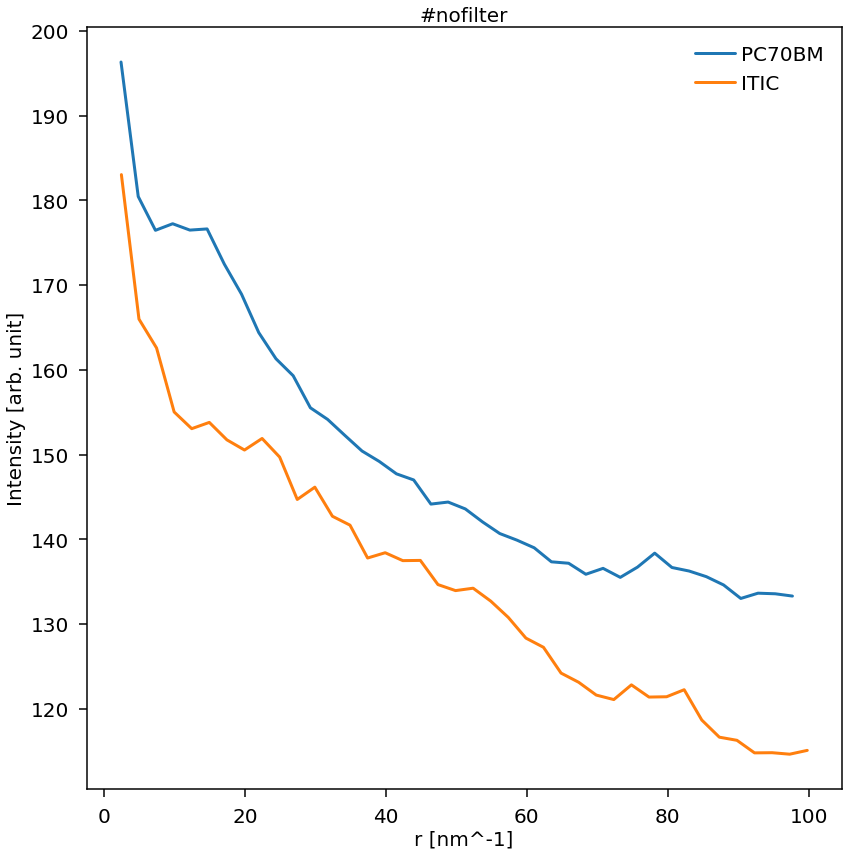

In [32]:
width = 12
height = 12
plt.figure(figsize=(width, height))
SLICE = 40

data = np.genfromtxt("ptb7_pcbm_sf.csv", delimiter=",", skip_header=1)
x, y, = data[:,0][:SLICE], data[:,1][:SLICE]
plt.plot(x,y, label="PC70BM")
data = np.genfromtxt("ptb7_itic_sf.csv", delimiter=",", skip_header=1)
x, y, = data[:,0][:SLICE], data[:,1][:SLICE]
plt.plot(x,y, label="ITIC")
plt.title("#nofilter", size=20)
plt.ylabel("Intensity [arb. unit]", size=20)
plt.xlabel("r [nm^-1]", size=20)
plt.legend(loc="best", prop={'size': 20})
#plt.axvline(20/(np.pi*2), color='k', linestyle='--')
plt.savefig("sf.png", transparent=True)

In [33]:
106/200

0.53

In [34]:
np.pi*2/(0.53)

11.855066617319974

In [53]:
(-1)**2

1

In [7]:
x = 2

## 

In [8]:
x *= 5

In [9]:
x

10

In [7]:
0.000572956500956023 == 5.72956500956023e-4

True

In [8]:
x = [2]
y = [3]

hi


In [13]:
test = {"mike":[27], "henry":[]}

In [14]:
if test["henry"]:
    print("hi")

In [5]:
my_list = [
['ca-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-ca-cc', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-ca-ha', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-cd-ss', 3.4655831739961753, 2.0, 3.141592653589],
['ca-c3-cc-cd', 3.8240917782026767, 2.0, 3.141592653589],
['ca-c3-cc-cc', 3.8240917782026767, 2.0, 3.141592653589],
['ca-c3-c3-c3', 0.14871468026343743, 3.0, 0.0],
['ca-ca-ca-cd', 3.4655831739961753, 2.0, 3.141592653589],
['cc-c3-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-cc-ss', 3.4655831739961753, 2.0, 3.141592653589],
['cd-c3-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['ha-ca-ca-cc', 0.6692160611854684, 2.0, 3.141592653589],
['ha-ca-ca-cd', 0.6692160611854684, 2.0, 3.141592653589],
['cd-c3-c3-c3', 0.14871468026343743, 3.0, 0.0],
['ss-cc-cd-cd', 3.8240917782026767, 2.0, 3.141592653589],
['c3-c3-c3-c3', 0.17208413001912046, 3.0, 0.0],
['c3-c3-c3-c3', 0.2390057361376673, 2.0, 3.141592653589],
['c3-c3-c3-c3', 0.19120458891013384, 1.0, 3.141592653589],
['c3-c3-c3-hc', 0.15296367112810708, 3.0, 0.0],
['cc-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['cc-ca-ca-ha', 0.6692160611854684, 2.0, 3.141592653589],
['cc-c3-c3-c3', 0.14871468026343743, 3.0, 0.0],
['cc-cc-cd-ss', 3.8240917782026767, 2.0, 3.141592653589],
['cd-cc-cc-cd', 3.8240917782026767, 2.0, 3.141592653589],
['cd-cc-cc-ha', 3.8240917782026767, 2.0, 3.141592653589],
['cd-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['cd-ca-ca-ha', 0.6692160611854684, 2.0, 3.141592653589],
['hc-c3-c3-c3', 0.15296367112810708, 3.0, 0.0],
['ca-ca-ca-nc', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-ce-ha', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-ca-ce', 3.4655831739961753, 2.0, 3.141592653589],
['nc-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['ha-ca-ca-ce', 0.6692160611854684, 2.0, 3.141592653589],
['cf-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['cf-ca-ca-ha', 0.6692160611854684, 2.0, 3.141592653589],
['ca-ca-cf-ha', 3.4655831739961753, 2.0, 3.141592653589],
['ca-c3-ca-ca', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-ha', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-cc', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-cd', 1.0516252390057361, 2.0, 3.141592653589],
['cd-ca-cc-ss', 1.0516252390057361, 2.0, 3.141592653589],
['cc-c3-cd-cd', 1.0516252390057361, 2.0, 3.141592653589],
['cd-cc-cd-ha', 1.0516252390057361, 2.0, 3.141592653589],
['cc-c3-cc-cd', 1.0516252390057361, 2.0, 3.141592653589],
['cc-ca-cd-ss', 1.0516252390057361, 2.0, 3.141592653589],
['cd-cc-cc-ha', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-ce', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-nc', 1.0516252390057361, 2.0, 3.141592653589],
['cd-ca-ce-ha', 1.0516252390057361, 2.0, 3.141592653589],
['ce-c-cd-ss', 1.0516252390057361, 2.0, 3.141592653589],
['ss-c-n-s', 1.0516252390057361, 2.0, 3.141592653589],
['c-c-n-c3', 1.0516252390057361, 2.0, 3.141592653589],
['o-c-cd-n', 10.038240917782026, 2.0, 3.141592653589],
['o-c-cc-n', 10.038240917782026, 2.0, 3.141592653589],
['cc-ca-cf-ha', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-cf', 1.0516252390057361, 2.0, 3.141592653589],
['last', 1.0516252390057361, 2.0, 3.141592653589],
['last', 1.0516252390057361, 1.0, 3.141592653589]]
#['really-last', 1.0516252390057361, -1.0, 3.141592653589]]


In [2]:
from itertools import tee


my_list = [
['ca-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-ca-cc', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-ca-ha', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-cd-ss', 3.4655831739961753, 2.0, 3.141592653589],
['ca-c3-cc-cd', 3.8240917782026767, 2.0, 3.141592653589],
['ca-c3-cc-cc', 3.8240917782026767, 2.0, 3.141592653589],
['ca-c3-c3-c3', 0.14871468026343743, 3.0, 0.0],
['ca-ca-ca-cd', 3.4655831739961753, 2.0, 3.141592653589],
['cc-c3-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-cc-ss', 3.4655831739961753, 2.0, 3.141592653589],
['cd-c3-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['ha-ca-ca-cc', 0.6692160611854684, 2.0, 3.141592653589],
['ha-ca-ca-cd', 0.6692160611854684, 2.0, 3.141592653589],
['cd-c3-c3-c3', 0.14871468026343743, 3.0, 0.0],
['ss-cc-cd-cd', 3.8240917782026767, 2.0, 3.141592653589],
['c3-c3-c3-c3', 0.17208413001912046, 3.0, 0.0],
['c3-c3-c3-c3', 0.2390057361376673, 2.0, 3.141592653589],
['c3-c3-c3-c3', 0.19120458891013384, 1.0, 3.141592653589],
['c3-c3-c3-hc', 0.15296367112810708, 3.0, 0.0],
['cc-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['cc-ca-ca-ha', 0.6692160611854684, 2.0, 3.141592653589],
['cc-c3-c3-c3', 0.14871468026343743, 3.0, 0.0],
['cc-cc-cd-ss', 3.8240917782026767, 2.0, 3.141592653589],
['cd-cc-cc-cd', 3.8240917782026767, 2.0, 3.141592653589],
['cd-cc-cc-ha', 3.8240917782026767, 2.0, 3.141592653589],
['cd-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['cd-ca-ca-ha', 0.6692160611854684, 2.0, 3.141592653589],
['hc-c3-c3-c3', 0.15296367112810708, 3.0, 0.0],
['ca-ca-ca-nc', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-ce-ha', 3.4655831739961753, 2.0, 3.141592653589],
['ca-ca-ca-ce', 3.4655831739961753, 2.0, 3.141592653589],
['nc-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['ha-ca-ca-ce', 0.6692160611854684, 2.0, 3.141592653589],
['cf-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589],
['cf-ca-ca-ha', 0.6692160611854684, 2.0, 3.141592653589],
['ca-ca-cf-ha', 3.4655831739961753, 2.0, 3.141592653589],
['ca-c3-ca-ca', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-ha', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-cc', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-cd', 1.0516252390057361, 2.0, 3.141592653589],
['cd-ca-cc-ss', 1.0516252390057361, 2.0, 3.141592653589],
['cc-c3-cd-cd', 1.0516252390057361, 2.0, 3.141592653589],
['cd-cc-cd-ha', 1.0516252390057361, 2.0, 3.141592653589],
['cc-c3-cc-cd', 1.0516252390057361, 2.0, 3.141592653589],
['cc-ca-cd-ss', 1.0516252390057361, 2.0, 3.141592653589],
['cd-cc-cc-ha', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-ce', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-nc', 1.0516252390057361, 2.0, 3.141592653589],
['cd-ca-ce-ha', 1.0516252390057361, 2.0, 3.141592653589],
['ce-c-cd-ss', 1.0516252390057361, 2.0, 3.141592653589],
['ss-c-n-s', 1.0516252390057361, 2.0, 3.141592653589],
['c-c-n-c3', 1.0516252390057361, 2.0, 3.141592653589],
['o-c-cd-n', 10.038240917782026, 2.0, 3.141592653589],
['o-c-cc-n', 10.038240917782026, 2.0, 3.141592653589],
['cc-ca-cf-ha', 1.0516252390057361, 2.0, 3.141592653589],
['ca-ca-ca-cf', 1.0516252390057361, 2.0, 3.141592653589],
['last', 1.0516252390057361, 2.0, 3.141592653589],
['last', 1.0516252390057361, 1.0, 3.141592653589],
['really-last', 1.0516252390057361, -1.0, 3.141592653589]]

def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def more_than_one_di(group):
    bar = []
    bar.append(group[0][0])
    for coefs in group:
        for parm in coefs[1:]:
            bar.append(parm)
    # call set di here, more than obne
    print(bar)
group = []    
for cur, _next in pairwise(my_list):
    if cur[0] == _next[0]:
        group.append(cur)
    else:
        group.append(cur)
        if len(group) > 1:
            more_than_one_di(group)
        else:
            # call set di here, only 1
            print(cur)
        group = []
else:
    group.append(cur)
    if len(group) > 1:
        more_than_one_di(group)
    else:
    # call set di here, only 1
        print(_next)



['ca-ca-ca-ca', 3.4655831739961753, 2.0, 3.141592653589]
['ca-ca-ca-cc', 3.4655831739961753, 2.0, 3.141592653589]
['ca-ca-ca-ha', 3.4655831739961753, 2.0, 3.141592653589]
['ca-ca-cd-ss', 3.4655831739961753, 2.0, 3.141592653589]
['ca-c3-cc-cd', 3.8240917782026767, 2.0, 3.141592653589]
['ca-c3-cc-cc', 3.8240917782026767, 2.0, 3.141592653589]
['ca-c3-c3-c3', 0.14871468026343743, 3.0, 0.0]
['ca-ca-ca-cd', 3.4655831739961753, 2.0, 3.141592653589]
['cc-c3-ca-ca', 3.4655831739961753, 2.0, 3.141592653589]
['ca-ca-cc-ss', 3.4655831739961753, 2.0, 3.141592653589]
['cd-c3-ca-ca', 3.4655831739961753, 2.0, 3.141592653589]
['ha-ca-ca-cc', 0.6692160611854684, 2.0, 3.141592653589]
['ha-ca-ca-cd', 0.6692160611854684, 2.0, 3.141592653589]
['cd-c3-c3-c3', 0.14871468026343743, 3.0, 0.0]
['ss-cc-cd-cd', 3.8240917782026767, 2.0, 3.141592653589]
['c3-c3-c3-c3', 0.17208413001912046, 3.0, 0.0, 0.2390057361376673, 2.0, 3.141592653589, 0.19120458891013384, 1.0, 3.141592653589]
['c3-c3-c3-hc', 0.15296367112810708

In [25]:
my_coefs = {
    "psi_k1":0,
    "period1":0,
    "phase1":0,
    "psi_k2":0,
    "period2":0,
    "phase2":0,
    "psi_k3":0,
    "period3":0,
    "phase3":0,
    "psi_k4":0,
    "period4":0,
    "phase4":0,
}

TypeError: foo() missing 3 required positional arguments: 'g', 'h', and 'i'

In [1]:
**ERROR**: Dihedral type hc-c3-c3-c3 not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-ca-ca not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-ca-ha not found in dihedral coeff
**ERROR**: Dihedral type ca-c3-cc-cc not found in dihedral coeff
**ERROR**: Dihedral type c3-c3-c3-hc not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-cd-ss not found in dihedral coeff
**ERROR**: Dihedral type c3-c3-c3-c3 not found in dihedral coeff
**ERROR**: Dihedral type cd-ca-ce-ha not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-ce-ha not found in dihedral coeff
**ERROR**: Dihedral type nc-ca-ca-ca not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-ca-nc not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-cc-ss not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-ca-ce not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-ca-cc not found in dihedral coeff
**ERROR**: Dihedral type ss-c-n-s not found in dihedral coeff
**ERROR**: Dihedral type ss-cc-cd-cd not found in dihedral coeff
**ERROR**: Dihedral type cf-ca-ca-ca not found in dihedral coeff
**ERROR**: Dihedral type cc-c3-cc-cd not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-ca-cf not found in dihedral coeff
**ERROR**: Dihedral type ca-c3-ca-ca not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-ca-cd not found in dihedral coeff
**ERROR**: Dihedral type cc-c3-ca-ca not found in dihedral coeff
**ERROR**: Dihedral type cd-c3-c3-c3 not found in dihedral coeff
**ERROR**: Dihedral type cd-ca-cc-ss not found in dihedral coeff
**ERROR**: Dihedral type cc-c3-c3-c3 not found in dihedral coeff
**ERROR**: Dihedral type ca-ca-cf-ha not found in dihedral coeff
**ERROR**: Dihedral type cd-cc-cd-ha not found in dihedral coeff
**ERROR**: Dihedral type cd-ca-ca-ca not found in dihedral coeff
**ERROR**: Dihedral type cf-ca-ca-ha not found in dihedral coeff
**ERROR**: Dihedral type ce-c-cd-ss not found in dihedral coeff
**ERROR**: Dihedral type cc-ca-ca-ca not found in dihedral coeff
**ERROR**: Dihedral type cd-cc-cc-cd not found in dihedral coeff
**ERROR**: Dihedral type ca-c3-c3-c3 not found in dihedral coeff
**ERROR**: Dihedral type cc-ca-cd-ss not found in dihedral coeff
**ERROR**: Dihedral type cd-c3-ca-ca not found in dihedral coeff
**ERROR**: Dihedral type ha-ca-ca-cd not found in dihedral coeff
**ERROR**: Dihedral type ha-ca-ca-ce not found in dihedral coeff
**ERROR**: Dihedral type cd-ca-ca-ha not found in dihedral coeff
**ERROR**: Dihedral type o-c-cc-n not found in dihedral coeff
**ERROR**: Dihedral type cd-cc-cc-ha not found in dihedral coeff
**ERROR**: Dihedral type c-c-n-c3 not found in dihedral coeff
**ERROR**: Dihedral type cc-ca-cf-ha not found in dihedral coeff
**ERROR**: Dihedral type cc-cc-cd-ss not found in dihedral coeff
**ERROR**: Dihedral type cc-c3-cd-cd not found in dihedral coeff
**ERROR**: Dihedral type ha-ca-ca-cc not found in dihedral coeff
**ERROR**: Dihedral type cc-ca-ca-ha not found in dihedral coeff
**ERROR**: Dihedral type o-c-cd-n not found in dihedral coeff
**ERROR**: Dihedral type ca-c3-cc-cd not found in dihedral coeff


SyntaxError: invalid syntax (<ipython-input-1-49e30b9643ea>, line 1)

In [2]:
params = ['c3-c3-c3-c3', 0.17208413001912046, 3.0, 0.0, 0.2390057361376673, 2.0, 3.141592653589, 0.19120458891013384, 1.0, 3.141592653589]

In [18]:
for _ in range(len(params[1:])//3):
    print(_*3, _*3+3)

0 3
3 6
6 9


In [9]:
params[1:][0:3]

[0.17208413001912046, 3.0, 0.0]

In [10]:
params[1:][3:6]

[0.2390057361376673, 2.0, 3.141592653589]

In [12]:
params[1:][6:9]

[0.19120458891013384, 1.0, 3.141592653589]

In [5]:
params = ['c3-c3-c3-c3', 0.17208413001912046, 3.0, 0.0, 0.2390057361376673, 2.0, 3.141592653589, 0.19120458891013384, 1.0, 3.141592653589]
my_coefs = {
    "psi_k1":0,
    "period1":0,
    "phase1":0,
    "psi_k2":0,
    "period2":0,
    "phase2":0,
    "psi_k3":0,
    "period3":0,
    "phase3":0,
    "psi_k4":0,
    "period4":0,
    "phase4":0,
}
for _ in range(len(params[1:])//3):
    for key, val in zip(my_coefs, params[1:][_*3:_*3+3]):
        key = key[:-1] + str(int(key[-1]) + _)
        my_coefs[key] = val
print(my_coefs)

{'psi_k1': 0.17208413001912046, 'period1': 3.0, 'phase1': 0.0, 'psi_k2': 0.2390057361376673, 'period2': 2.0, 'phase2': 3.141592653589, 'psi_k3': 0.19120458891013384, 'period3': 1.0, 'phase3': 3.141592653589, 'psi_k4': 0, 'period4': 0, 'phase4': 0}


KeyError: -1

In [7]:
my_coefs.period1

AttributeError: 'dict' object has no attribute 'period1'

In [6]:
(1.66e-24*1e24)

1.6600000000000001

In [7]:
1.66**(1/3)

1.1840481475428983

In [8]:
1.1841763

1.1841763

In [11]:
(1.66e-27*1e27/1000)

0.00166

In [1]:
# 300
# Target (angstroms)
L_t = 7.33841925673639
# Actual 
L_a = 20.592743282667005
# Ref
ref_distance=0.35635948725613575

# now with .3
# Works!

In [3]:
L_t/ref_distance

20.592742775673187

In [4]:
102.3678524247939*ref_distance

36.47975540161133

In [5]:
~36.5 nm

SyntaxError: invalid syntax (<ipython-input-5-4a6b79898529>, line 1)

In [8]:
(0.985 * 600)*86400

51062400.0

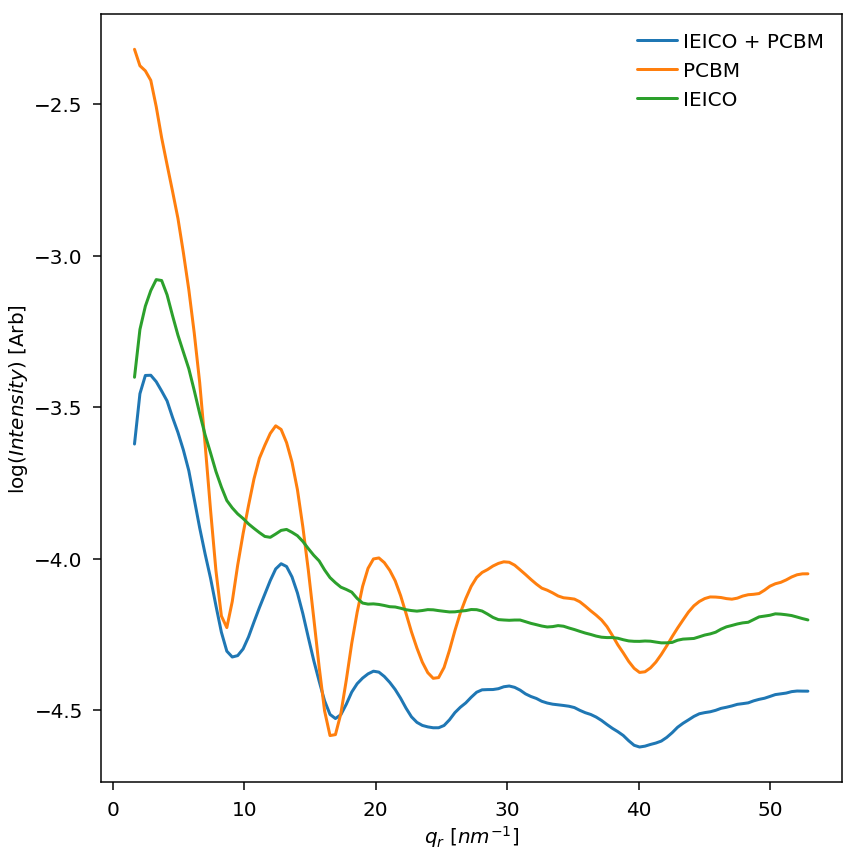

In [162]:
width = 12
height = 12
plt.figure(figsize=(width, height))

slice_f = 4
slice_b = 3
#data = np.genfromtxt("ptb7_pcbm_sf.csv", delimiter=",", skip_header=1)
#x, y, = data[:,0][:SLICE], data[:,1][:SLICE]
#plt.plot(x,y, label="PC70BM")
#data = np.genfromtxt("r2/diffract/difout/asq.txt")

data = np.genfromtxt("r2/diffract/alldiff/asq.txt")
x, y = data[:,0], data[:,1]
x, y = x[slice_f:], y[slice_f:] 
plt.plot(x,y, label="IEICO + PCBM")

data = np.genfromtxt("r2/diffract/pcbm/asq.txt")
x, y = data[:,0], data[:,1]
x, y = x[slice_f:], y[slice_f:] 
plt.plot(x,y, label="PCBM")


data = np.genfromtxt("r2/diffract/ieico/asq.txt")
x, y = data[:,0], data[:,1]
x, y = x[slice_f:], y[slice_f:] 
plt.plot(x,y, label="IEICO")
#plt.axvline(20/(np.pi*2), color='k', linestyle='--')

plt.title("", size=20)
plt.xlabel(r"$q_r$ [$nm^{-1}$]", size=20)
plt.ylabel(r"$\log(Intensity)$ [Arb]", size=20)
plt.legend(loc="best", prop={'size': 20})
plt.savefig("sf.png", transparent=True)

In [163]:
(2*np.pi)/12

0.5235987755982988

In [164]:
(2*np.pi)/20

0.3141592653589793

In [165]:
(2*np.pi)/2

3.141592653589793

In [153]:
import gsd.hoomd

my_gsd = gsd.hoomd.open("r2/trajectory.gsd").read_frame(-1)
my_types = my_gsd.particles.types
type_ids = my_gsd.particles.typeid
N = my_gsd.particles.N
all_idx = set(range(N))
type_dic = {key: value for key, value in enumerate(my_types)}
typeid_to_type = [type_dic[typeid] for typeid in type_ids]
# First lets skip out all the molecules we don't want
# PCBM
cut = 8800 # First idx of IEICO
types_to_drop = ["ha", "hc", "h1", "c3"]
PCBM_idx = set(range(0,cut))
IEICO_idx = set(range(cut,N))
idx_to_drop = set()
for atom_idx, atom_type in enumerate(typeid_to_type):
    if atom_type in types_to_drop:
        idx_to_drop.add(atom_idx)
        
IEICO_idx = IEICO_idx - idx_to_drop
PCBM_idx = PCBM_idx - idx_to_drop
assert len(IEICO_idx) + len(PCBM_idx) == len(all_idx) - len(idx_to_drop)
PCBM_idx_list = list(PCBM_idx)
PCBM_idx_list.sort()
IEICO_idx_list = list(IEICO_idx)
IEICO_idx_list.sort()
with open('r2/PCBM_idx.txt', 'w') as f:
    for idx in PCBM_idx_list:
        f.write(f"{idx}\n")
with open('r2/IEICO_idx.txt', 'w') as f:
    for idx in IEICO_idx_list:
        f.write(f"{idx}\n")

In [144]:
IEICO_idx_list[-1], PCBM_idx_list[-1]

(33190, 8785)

In [147]:
len(PCBM_idx_list)

7000

In [82]:
[0,1,2,3,4][:3]

[0, 1, 2]

In [83]:
ids_to_skip[0], ids_to_skip[-1]

(8800, 8)

In [78]:
len(ids_to_skip)

33200

In [95]:
ids_to_skip[0]

8800

In [100]:
ids_to_skip[-1]

8799

In [113]:
ids_to_skip[24399], ids_to_skip[24400]

TypeError: 'set' object does not support indexing

In [107]:
8800 - N

-24400

In [166]:
1.380e-23/1e3*6e23

0.008280000000000001

In [167]:
1/378

0.0026455026455026454

In [168]:
378/3

126.0

In [169]:
106.68417424714445*0.35635948725613575

38.01791763305664

In [170]:
2.09*0.35635948725613575

0.7447913283653237

In [171]:
22/5

4.4

In [172]:
37/5

7.4

In [ ]:
7